###  Mohit A. Janbandhu
   - Mo. No.: 8806818081  
   - Email Id: mohitjanbandhu44@gmail.com
  - LinkedIn: https://www.linkedin.com/in/mohitjanbandhu 
  - Github : https://github.com/MJanbandhu  
 

#### Have to create a ML model that predict the probability that a piece of text belongs to a particular class

Use techniques like Bag of Words, tf- idf vectorization and word embedding. Please use Hash field value and explain how you are going to use the Hash field.


# Import Library

    which we help to perform some task



In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

# Load Data

In [2]:
# Loading the data
train_df = pd.read_csv('train.csv') # training data
test_df = pd.read_csv('test.csv',header=None) # test data
train_target_df = pd.read_csv('trainLabels.csv') # label Data

# Domain Analysis

In [3]:
train_df.columns

Index(['id', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'x136', 'x137', 'x138', 'x139', 'x140', 'x141', 'x142', 'x143', 'x144',
       'x145'],
      dtype='object', length=146)

#### All the files are CSV.

  -  train.csv - the features x x of the training set. Each row corresponds to a different sample, while each column is a different feature.
- trainLabels.csv - the expected labels y y for the training set. Each row corresponds to a different sample, while each column is a different label. The order of the rows is aligned with train.csv.
 - test.csv - the features x x of the test set. Each row corresponds to a different sample, while each column is a different feature.



# Basic Check

- and Here I'm not going to change any variable or column name


In [4]:
# print five rows of train dat
train_df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045


In [5]:
train_target_df.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,1698001,NO,NO,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.414798,0.000000,1.000000,0.000000,0.202060,...,0.0,1.000000,1262,892,NO,NO,NO,0,0.089686,0.193344
1,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
2,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
3,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
4,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909


In [7]:
test_df.columns=['id',
                 'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',
                 'x11','x12','x13','x14','x15','x16','x17','x18','x19','x20',
                 'x21','x22','x23','x24','x25','x26','x27','x28','x29','x30',
                 'x31','x32','x33','x34','x35','x36','x37','x38','x39','x40',
                 'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50',
                 'x51','x52','x53','x54','x55','x56','x57','x58','x59','x60',
                 'x61','x62','x63','x64','x65','x66','x67','x68','x69','x70',
                 'x71','x72','x73','x74','x75','x76','x77','x78','x79','x80',
                 'x81','x82','x83','x84','x85','x86','x87','x88','x89','x90',
                 'x91','x92','x93','x94','x95','x96','x97','x98','x99','x100',
                 'x101','x102','x103','x104','x105','x106','x107','x108','x109','x110',
                 'x111','x112','x113','x114','x115','x116','x117','x118','x119','x120',
                 'x121','x122','x123','x124','x125','x126','x127','x128','x129','x130',
                 'x131','x132','x133','x134','x135','x136','x137','x138','x139','x140',
                 'x141','x142','x143','x144','x145']

In [8]:
# Get Number of Dimensions
train_ndim = train_df.ndim
train_labels_ndim = train_target_df.ndim
test_ndim = test_df.ndim

print(f"Number of dimensions of train_df: {train_ndim}")
print(f"Number of dimensions of train_labels_df: {train_labels_ndim}")
print(f"Number of dimensions of test_df: {test_ndim}")

Number of dimensions of train_df: 2
Number of dimensions of train_labels_df: 2
Number of dimensions of test_df: 2


In [9]:
# Print shapes of the data to understand the structure
print(f"Shape of train_df: " ,train_df.shape)
print(f"Shape of train_labels_df:",train_target_df.shape)
print(f"Shape of test_df:",test_df.shape)

Shape of train_df:  (9999, 146)
Shape of train_labels_df: (49999, 34)
Shape of test_df: (2000, 146)


In [10]:
# Print sizes
print(f"Size of train dataset: {train_df.size}")
print(f"Size of train labels dataset: {train_target_df.size}")
print(f"Size of test dataset: {test_df.size}")

Size of train dataset: 1459854
Size of train labels dataset: 1699966
Size of test dataset: 292000


In [11]:
# Print number of columns
print("Number of columns in train dataset:", train_df.shape[1])
print(f"Number of columns in train labels dataset:",train_target_df.shape[1])
print(f"Number of columns in test dataset: ",test_df.shape[1])

Number of columns in train dataset: 146
Number of columns in train labels dataset: 34
Number of columns in test dataset:  146


In [12]:
# Print data types
print("Data Types of train dataset:", train_df.dtypes)
print("Data Types of train labels dataset:", train_target_df.dtypes)
print("Data Types of test dataset:", test_df.dtypes)

Data Types of train dataset: id        int64
x1       object
x2       object
x3       object
x4       object
         ...   
x141     object
x142     object
x143      int64
x144    float64
x145    float64
Length: 146, dtype: object
Data Types of train labels dataset: id     int64
y1     int64
y2     int64
y3     int64
y4     int64
y5     int64
y6     int64
y7     int64
y8     int64
y9     int64
y10    int64
y11    int64
y12    int64
y13    int64
y14    int64
y15    int64
y16    int64
y17    int64
y18    int64
y19    int64
y20    int64
y21    int64
y22    int64
y23    int64
y24    int64
y25    int64
y26    int64
y27    int64
y28    int64
y29    int64
y30    int64
y31    int64
y32    int64
y33    int64
dtype: object
Data Types of test dataset: id        int64
x1       object
x2       object
x3       object
x4       object
         ...   
x141     object
x142     object
x143      int64
x144    float64
x145    float64
Length: 146, dtype: object


In [13]:
print("Info of test dataset:",train_df.info())
print("Info of test dataset:",train_target_df.info())
print("Info of test dataset:",test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 146 entries, id to x145
dtypes: float64(55), int64(31), object(60)
memory usage: 11.1+ MB
Info of test dataset: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      49999 non-null  int64
 1   y1      49999 non-null  int64
 2   y2      49999 non-null  int64
 3   y3      49999 non-null  int64
 4   y4      49999 non-null  int64
 5   y5      49999 non-null  int64
 6   y6      49999 non-null  int64
 7   y7      49999 non-null  int64
 8   y8      49999 non-null  int64
 9   y9      49999 non-null  int64
 10  y10     49999 non-null  int64
 11  y11     49999 non-null  int64
 12  y12     49999 non-null  int64
 13  y13     49999 non-null  int64
 14  y14     49999 non-null  int64
 15  y15     49999 non-null  int64
 16  y16     49999 non-null  int64
 17  y17     49999 non-nul

In [14]:
#All rows that has atleast one NAN value
train_df[train_df.isna().any(axis=1)]

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.51,4678,3306,YES,NO,YES,4,0.741682,0.593630
8,9,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.82,4675,3304,YES,NO,YES,1,0.923426,0.702032
12,13,NO,NO,vIR+5O6D5pKgFw/CFbDtHBZ/AhaNMnxLM4BTIwXUres=,gNVKedeHcKHyWnIMnBCE9t9XOschRQCU8/XfcaY0mMk=,0.440411,0.083787,0.776165,0.253781,0.210774,...,0.0,0.74,4678,3306,YES,NO,YES,0,0.029643,0.199230
25,26,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.00,1188,918,YES,NO,YES,5,0.898693,0.502525
26,27,NO,NO,EKynK11V/TnbPzoD8gy12kkm85wTNzN4kciauQQOHO8=,LXzIvxHIblNu5ThzWnaNlPxZrF3BRg4q4JWZPXQ5Z40=,1.415919,0.000000,1.000000,0.000000,0.889153,...,0.0,1.00,1263,892,YES,NO,YES,0,0.032511,0.883610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,9979,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.00,1262,892,YES,NO,YES,1,0.838565,0.194136
9983,9984,NO,NO,/A8gcPhvt4VEgUwvb8EOaJsx1W/EJcRZvR+LpZQCG5I=,hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=,1.414798,0.000000,1.000000,0.000000,0.798732,...,0.0,1.00,1262,892,YES,NO,YES,1,0.454036,0.787639
9985,9986,NO,NO,jSCyZ7TLJ2iF5csw4WvfdUDPg0rilDps2Bz6vPTD6K4=,k/m0ZdAeAo2VCPgrn4lo9Aow1dirDyCAmhbX5fvZd7M=,0.793166,0.074085,0.767765,0.617780,0.479581,...,0.0,0.91,4677,3307,NO,NO,NO,0,0.167523,0.470601
9991,9992,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.00,1263,893,YES,YES,YES,4,0.731243,0.284244


In [ ]:
# Import necessary libraries
from sklearn.metrics import hamming_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

# Data Preprocessing 

In [15]:
# cheking missing values in train dataset
train_df.isnull().sum()

id         0
x1      1426
x2      1426
x3      1426
x4      1426
        ... 
x141       0
x142       0
x143       0
x144       0
x145       0
Length: 146, dtype: int64

In [16]:
# check percentage of missing values in train lable dataset
train_target_df.isnull().sum()/len(train_target_df)*100

# here isn't any missing values

id     0.0
y1     0.0
y2     0.0
y3     0.0
y4     0.0
y5     0.0
y6     0.0
y7     0.0
y8     0.0
y9     0.0
y10    0.0
y11    0.0
y12    0.0
y13    0.0
y14    0.0
y15    0.0
y16    0.0
y17    0.0
y18    0.0
y19    0.0
y20    0.0
y21    0.0
y22    0.0
y23    0.0
y24    0.0
y25    0.0
y26    0.0
y27    0.0
y28    0.0
y29    0.0
y30    0.0
y31    0.0
y32    0.0
y33    0.0
dtype: float64

In [17]:
# check percentage of missing values in test dataset
test_df.isnull().sum()/len(test_df)*100

id       0.0
x1      14.7
x2      14.7
x3      14.7
x4      14.7
        ... 
x141     0.0
x142     0.0
x143     0.0
x144     0.0
x145     0.0
Length: 146, dtype: float64

In [18]:
missing_percent_training_data=train_df.isna().sum().sort_values(ascending=False)*100/len(train_df)
missing_percent_training_data

x26     14.261426
x12     14.261426
x2      14.261426
x3      14.261426
x4      14.261426
          ...    
x53      0.000000
x52      0.000000
x51      0.000000
x50      0.000000
x145     0.000000
Length: 146, dtype: float64

In [19]:
missing_percent_train_target_data=train_target_df.isna().sum().sort_values(ascending=False)*100/len(train_target_df)
missing_percent_train_target_data

id     0.0
y25    0.0
y19    0.0
y20    0.0
y21    0.0
y22    0.0
y23    0.0
y24    0.0
y26    0.0
y1     0.0
y27    0.0
y28    0.0
y29    0.0
y30    0.0
y31    0.0
y32    0.0
y18    0.0
y17    0.0
y16    0.0
y15    0.0
y14    0.0
y13    0.0
y12    0.0
y11    0.0
y10    0.0
y9     0.0
y8     0.0
y7     0.0
y6     0.0
y5     0.0
y4     0.0
y3     0.0
y2     0.0
y33    0.0
dtype: float64

In [20]:
missing_percent_test_data=test_df.isna().sum().sort_values(ascending=False)*100/len(test_df)
missing_percent_test_data

x26     14.7
x12     14.7
x2      14.7
x3      14.7
x4      14.7
        ... 
x53      0.0
x52      0.0
x51      0.0
x50      0.0
x145     0.0
Length: 146, dtype: float64

In [21]:
# fetching numerical columns from train.df dataset
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns=train_df.select_dtypes(include=numerics).columns.to_list()
len(numeric_columns) 

86

In [22]:
# fetching categorical columns from train.df dataset
object_columns=train_df.select_dtypes(include=object).columns
len(object_columns)

60

In [23]:
object_columns

Index(['x1', 'x2', 'x3', 'x4', 'x10', 'x11', 'x12', 'x13', 'x14', 'x24', 'x25',
       'x26', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x41', 'x42', 'x43',
       'x44', 'x45', 'x55', 'x56', 'x57', 'x61', 'x62', 'x63', 'x64', 'x65',
       'x71', 'x72', 'x73', 'x74', 'x75', 'x85', 'x86', 'x87', 'x91', 'x92',
       'x93', 'x94', 'x95', 'x101', 'x102', 'x103', 'x104', 'x105', 'x115',
       'x116', 'x117', 'x126', 'x127', 'x128', 'x129', 'x130', 'x140', 'x141',
       'x142'],
      dtype='object')

In [24]:
train_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [25]:
# Convert object columns to strings for uniformity
train_df[object_columns]=train_df[object_columns].astype(str)
test_df[object_columns]=test_df[object_columns].astype(str)

In [26]:
train_df[object_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      9999 non-null   object
 1   x2      9999 non-null   object
 2   x3      9999 non-null   object
 3   x4      9999 non-null   object
 4   x10     9999 non-null   object
 5   x11     9999 non-null   object
 6   x12     9999 non-null   object
 7   x13     9999 non-null   object
 8   x14     9999 non-null   object
 9   x24     9999 non-null   object
 10  x25     9999 non-null   object
 11  x26     9999 non-null   object
 12  x30     9999 non-null   object
 13  x31     9999 non-null   object
 14  x32     9999 non-null   object
 15  x33     9999 non-null   object
 16  x34     9999 non-null   object
 17  x35     9999 non-null   object
 18  x41     9999 non-null   object
 19  x42     9999 non-null   object
 20  x43     9999 non-null   object
 21  x44     9999 non-null   object
 22  x45     9999 non-null   

In [27]:
boolean_cols = []
alphanumeric_cols = []

for col in object_columns:
    if train_df[col][0].isupper()==True:
        boolean_cols.append(col)
    else:
        alphanumeric_cols.append(col)

In [28]:
alphanumeric_cols

['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']

In [29]:
train_df['x3'].value_counts()

nan                                             1426
MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=     290
X/hdUOVR5KuExVGLzjhLcM2CyIqym9t0Nh+ZX05M+1w=     100
3acC0FNTp8BjTkXkLzy9LJSB0FmLpzsJhDtE3riGZ9A=      70
zq3MyXbqpnH+txFzhEWomNfZyeLXubUbZwdaRvKXLs4=      68
                                                ... 
xjmTLdl3cvznW2FwUHzAy1isqqQ/MM75nhLGKaSAEFY=       1
32TnZIoTdTuMO/QEiTndO7R2De+TXxjzsCcGB68PxSs=       1
Zpdzn+mU6g3vVZMqG3IiKWgYk08wwV0eyt7zxX+yew8=       1
l+LC+epkima2ujQczUHf+UXtXJfTXY7r7PDdGSSdSvg=       1
9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=       1
Name: x3, Length: 4752, dtype: int64

In [30]:
train_df[boolean_cols]=train_df[boolean_cols].astype('category')
test_df[boolean_cols]=test_df[boolean_cols].astype('category')

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 146 entries, id to x145
dtypes: category(50), float64(55), int64(31), object(10)
memory usage: 7.8+ MB


In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 146 entries, id to x145
dtypes: category(50), float64(55), int64(31), object(10)
memory usage: 1.6+ MB


In [33]:
# Fill missing values
# Creating imputers for filling missing values: mean for numeric, most frequent for categorical
from sklearn.impute import SimpleImputer
num_imputer=SimpleImputer(strategy='mean')

In [34]:
obj_imputer=SimpleImputer(strategy='most_frequent')

In [35]:
# Fit and transform the numeric columns in training data
num_imputer.fit(train_df[numeric_columns])
train_df[numeric_columns]=num_imputer.transform(train_df[numeric_columns])

In [36]:
num_imputer.fit(test_df[numeric_columns])

SimpleImputer()

In [37]:
test_df[numeric_columns]=num_imputer.transform(test_df[numeric_columns])

In [38]:
train_df[numeric_columns].isna().sum().sort_values(ascending=False)

id      0
x98     0
x111    0
x110    0
x109    0
       ..
x50     0
x49     0
x48     0
x47     0
x145    0
Length: 86, dtype: int64

In [39]:
test_df[numeric_columns].isna().sum().sort_values(ascending=False)

id      0
x98     0
x111    0
x110    0
x109    0
       ..
x50     0
x49     0
x48     0
x47     0
x145    0
Length: 86, dtype: int64

In [40]:
# Convert 'YES'/'NO' to 1/0  
train_df.replace('nan', None, inplace=True)
test_df.replace('nan', None, inplace=True)

In [41]:
train_df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1.0,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306.0,4676.0,YES,NO,YES,2.0,0.375535,0.464610
1,2.0,NaN,NaN,None,None,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678.0,3306.0,YES,NO,YES,4.0,0.741682,0.593630
2,3.0,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678.0,3306.0,NO,NO,NO,1.0,0.776467,0.493159
3,4.0,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306.0,4678.0,NO,NO,YES,3.0,0.168234,0.546582
4,5.0,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263.0,892.0,NO,NO,NO,1.0,0.246637,0.361045


In [42]:
# Convert 'YES'/'NO' to 1/0 for categorical boolean columns
for col in boolean_cols:
    train_df[col].replace({'YES':1, 'NO':0},inplace=True)
    test_df[col].replace({'YES':1, 'NO':0},inplace=True)

In [43]:
train_df[boolean_cols]

,x1,x2,x10,x11,x12,x13,x14,x24,x25,x26,...,x116,x117,x126,x127,x128,x129,x130,x140,x141,x142
0,0,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
9995,0,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,1
9996,1,1,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
# Fit and transform the object columns in training data
obj_imputer.fit(train_df[boolean_cols])
train_df[boolean_cols]=obj_imputer.transform(train_df[boolean_cols])

In [45]:
obj_imputer.fit(test_df[boolean_cols])
test_df[boolean_cols]=obj_imputer.transform(test_df[boolean_cols])

In [46]:
test_df[boolean_cols]

,x1,x2,x10,x11,x12,x13,x14,x24,x25,x26,...,x116,x117,x126,x127,x128,x129,x130,x140,x141,x142
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,1,1,0,1
1996,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0


In [47]:
train_df[boolean_cols]

,x1,x2,x10,x11,x12,x13,x14,x24,x25,x26,...,x116,x117,x126,x127,x128,x129,x130,x140,x141,x142
0,0,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
9995,0,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,1
9996,1,1,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
train_df[boolean_cols].isna().sum().sort_values(ascending=False)

x1      0
x104    0
x74     0
x75     0
x85     0
x86     0
x87     0
x92     0
x93     0
x101    0
x102    0
x103    0
x105    0
x2      0
x115    0
x116    0
x117    0
x126    0
x127    0
x128    0
x129    0
x130    0
x140    0
x141    0
x73     0
x72     0
x71     0
x63     0
x10     0
x11     0
x12     0
x13     0
x14     0
x24     0
x25     0
x26     0
x30     0
x31     0
x32     0
x33     0
x41     0
x42     0
x43     0
x44     0
x45     0
x55     0
x56     0
x57     0
x62     0
x142    0
dtype: int64

In [49]:
train_df[boolean_cols]=train_df[boolean_cols].astype('int')
test_df[boolean_cols]=test_df[boolean_cols].astype('int')

In [50]:
train_df[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      9999 non-null   float64
 1   x5      9999 non-null   float64
 2   x6      9999 non-null   float64
 3   x7      9999 non-null   float64
 4   x8      9999 non-null   float64
 5   x9      9999 non-null   float64
 6   x15     9999 non-null   float64
 7   x16     9999 non-null   float64
 8   x17     9999 non-null   float64
 9   x18     9999 non-null   float64
 10  x19     9999 non-null   float64
 11  x20     9999 non-null   float64
 12  x21     9999 non-null   float64
 13  x22     9999 non-null   float64
 14  x23     9999 non-null   float64
 15  x27     9999 non-null   float64
 16  x28     9999 non-null   float64
 17  x29     9999 non-null   float64
 18  x36     9999 non-null   float64
 19  x37     9999 non-null   float64
 20  x38     9999 non-null   float64
 21  x39     9999 non-null   float64
 22  

In [51]:
# Prepare training and test data
# Exclude the ID column from features
exclude_column = 'id'
numeric_columns = list(filter(lambda col: col != exclude_column, numeric_columns))

In [52]:
# Combine numeric and object columns for training and test data
X_train = train_df[numeric_columns+boolean_cols]
X_test  = test_df[numeric_columns+boolean_cols]
Y_train = train_target_df.loc[:9998,'y1':]   # Target variables for training

In [53]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(9999, 135)
(9999, 33)
(2000, 135)


In [54]:
X_train

,x5,x6,x7,x8,x9,x15,x16,x17,x18,x19,...,x116,x117,x126,x127,x128,x129,x130,x140,x141,x142
0,0.576561,0.073139,0.481394,0.115697,0.472474,42.0,0.396065,3.0,6.0,0.991018,...,0,1,1,0,0,0,0,1,0,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0,0,1,0,0,0,0,1,0,1
2,1.341803,0.051422,0.935572,0.041440,0.501710,2.0,0.838475,3.0,5.0,0.966122,...,0,0,0,0,1,0,0,0,0,0
3,0.653912,0.041471,0.940787,0.090851,0.556564,37.0,0.127405,8.0,15.0,0.959171,...,0,1,1,0,0,0,0,0,0,1
4,1.415919,0.000000,1.000000,0.000000,0.375297,1.0,0.523543,4.0,11.0,0.963004,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1.207136,0.082855,0.918960,0.313880,0.495189,10.0,0.512852,3.0,7.0,0.967342,...,0,0,1,0,0,0,0,1,0,1
9995,1.414798,0.000000,1.000000,0.000000,0.357369,6.0,0.864350,4.0,17.0,0.974215,...,0,1,1,0,0,0,0,1,0,1
9996,1.413677,0.000000,1.000000,0.000000,0.668517,3.0,0.865471,6.0,7.0,0.939462,...,0,0,1,0,0,0,0,1,0,1
9997,1.294118,0.000000,1.000000,0.000000,0.570707,7.0,0.400871,8.0,11.0,0.949891,...,0,0,0,0,1,0,0,0,0,0


In [55]:
# Hash and scale alphanumeric columns
# This helps in handling categorical variables by hashing and scaling

def hash_columns(df, columns_to_hash):
    hashed_df = pd.DataFrame()

    for column in alphanumeric_cols:
        hashed_df['hashed_'+column] = df[column].apply(hash)

    return hashed_df

hashed_train_df = hash_columns(train_df,alphanumeric_cols)

hashed_test_df = hash_columns(test_df,alphanumeric_cols)

In [56]:
# Scaling hashed columns to ensure uniformity
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_hashed_train_df = pd.DataFrame(scaler.fit_transform(hashed_train_df), columns=hashed_train_df.columns)
scaled_hashed_test_df = pd.DataFrame(scaler.transform(hashed_test_df), columns=hashed_test_df.columns)

In [57]:
scaled_hashed_train_df

,hashed_x3,hashed_x4,hashed_x34,hashed_x35,hashed_x61,hashed_x64,hashed_x65,hashed_x91,hashed_x94,hashed_x95
0,0.442348,0.460249,0.396760,0.119761,0.344562,0.677008,0.759372,0.274633,0.922169,0.027207
1,0.500002,0.500625,0.157767,0.950085,0.404171,0.851843,0.210086,0.034015,0.425426,0.839660
2,0.333899,0.838229,0.488198,0.817808,0.039754,0.978703,0.777107,0.837117,0.505211,0.483574
3,0.420039,0.493163,0.420039,0.493163,0.461005,0.017543,0.492720,0.763042,0.017245,0.494005
4,0.024656,0.295587,0.370226,0.340703,0.116063,0.621930,0.175215,0.450357,0.925381,0.542335
...,...,...,...,...,...,...,...,...,...,...
9994,0.276509,0.320976,0.506233,0.340426,0.322437,0.056847,0.295322,0.525199,0.346235,0.924208
9995,0.655218,0.034060,0.826588,0.777805,0.652153,0.826588,0.777107,0.341840,0.827470,0.779133
9996,0.881889,0.777805,0.833157,0.402205,0.881881,0.429875,0.034029,0.776773,0.502674,0.857746
9997,0.617576,0.277498,0.056605,0.320976,0.271552,0.056605,0.320688,0.731397,0.209628,0.175672


# Model Building/Creation

In [58]:
# Combine hashed columns with the original data
X_train_hash = pd.concat([X_train,scaled_hashed_train_df], axis=1)
X_test_hash = pd.concat([X_test,scaled_hashed_test_df], axis=1)

In [59]:
print(X_train_hash.shape)
print(Y_train.shape)
print(X_test_hash.shape)

(9999, 145)
(9999, 33)
(2000, 145)


## Logistic Regression

In [61]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsRestClassifier
model_lr = OneVsRestClassifier(LogisticRegression()) 
model_lr.fit(X_train_hash, Y_train)             # Training the model

OneVsRestClassifier(estimator=LogisticRegression())

In [62]:
Y_pred_lr = model_lr.predict(X_train_hash) # Predicting on training data


#### Evaluation the Model

In [63]:
from sklearn.metrics import hamming_loss,confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
ham_loss_lr = hamming_loss(Y_train, Y_pred_lr)  # Calculating Hamming loss
acc_score_lr = accuracy_score(Y_train, Y_pred_lr)    # Calculating accuracy
class_report_lr = classification_report(Y_train, Y_pred_lr) # Generating classification report

In [64]:
print("LogisticRegression - Hamming Loss:", ham_loss_lr)
print("LogisticRegression - Accuracy Score:", acc_score_lr)
print("LogisticRegression - Classification Report:\n", class_report_lr)

LogisticRegression - Hamming Loss: 0.025978355411298705
LogisticRegression - Accuracy Score: 0.48594859485948594
LogisticRegression - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00       220
           3       0.00      0.00      0.00       156
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00       761
           6       0.60      0.14      0.22       350
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00       774
           9       0.60      0.02      0.04       156
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00       742
          12       0.00      0.00      0.00       132
          13       0.00      0.00      0.00         0
          14       0.00      0.

## Decision Tree

In [65]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
model_dt = OneVsRestClassifier(DecisionTreeClassifier())
model_dt.fit(X_train_hash, Y_train)   # Training the model


OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [66]:
Y_pred_dt = model_dt.predict(X_train_hash) # Predicting on training data


#### Evaluation the Model

In [67]:

ham_loss_dt = hamming_loss(Y_train, Y_pred_dt)   # Calculating Hamming loss
acc_score_dt = accuracy_score(Y_train, Y_pred_dt)  # Calculating accuracy
class_report_dt = classification_report(Y_train, Y_pred_dt)  # Generating classification report



In [68]:
print("DecisionTree - Hamming Loss:", ham_loss_dt)
print("DecisionTree - Accuracy Score:", acc_score_dt)
print("DecisionTree - Classification Report:\n", class_report_dt)

DecisionTree - Hamming Loss: 0.0
DecisionTree - Accuracy Score: 1.0
DecisionTree - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00       761
           6       1.00      1.00      1.00       350
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00       774
           9       1.00      1.00      1.00       156
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00       742
          12       1.00      1.00      1.00       132
          13       0.00      0.00      0.00         0
          14       1.00      1.00      1.00        27
          15       1.00     

## Decision Tree Hyperparameter Tuning

In [69]:
# Hyperparameter tuning for DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
params_dt = {'estimator__max_depth': [5, 10, 15], 'estimator__min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(OneVsRestClassifier(DecisionTreeClassifier()), param_grid=params_dt, cv=3)
grid_dt.fit(X_train_hash, Y_train)  # Training the model
best_dt = grid_dt.best_estimator_
Y_pred_dt_hyper = best_dt.predict(X_train_hash)   # Predicting on training data


#### Evaluation the Model

In [70]:
ham_loss_dt_hyper = hamming_loss(Y_train, Y_pred_dt_hyper)      # Calculating Hamming loss
acc_score_dt_hyper = accuracy_score(Y_train, Y_pred_dt_hyper)  # Calculating accuracy
class_report_dt_hyper = classification_report(Y_train, Y_pred_dt_hyper)  # Generating classification report

In [71]:
print("DecisionTree with Hyperparameters - Hamming Loss:", ham_loss_dt_hyper)
print("DecisionTree with Hyperparameters - Accuracy Score:", acc_score_dt_hyper)
print("DecisionTree with Hyperparameters - Classification Report:\n", class_report_dt_hyper)

DecisionTree with Hyperparameters - Hamming Loss: 0.013831686198922923
DecisionTree with Hyperparameters - Accuracy Score: 0.6772677267726772
DecisionTree with Hyperparameters - Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.58      0.67        60
           1       1.00      0.83      0.91         6
           2       0.85      0.99      0.92       220
           3       0.94      0.98      0.96       156
           4       0.00      0.00      0.00         2
           5       0.92      0.45      0.60       761
           6       0.83      0.32      0.46       350
           7       1.00      0.17      0.29         6
           8       0.90      0.66      0.76       774
           9       0.81      0.53      0.64       156
          10       1.00      1.00      1.00         6
          11       0.91      0.45      0.60       742
          12       0.92      0.35      0.51       132
          13       0.00      0.00      0.

## Random Forest

In [72]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
model_rf = OneVsRestClassifier(RandomForestClassifier())
model_rf.fit(X_train_hash, Y_train)  # Training the model


OneVsRestClassifier(estimator=RandomForestClassifier())

In [73]:
Y_pred_rf = model_rf.predict(X_train_hash)  # Predicting on training data


#### Evaluation the Model

In [74]:
ham_loss_rf = hamming_loss(Y_train, Y_pred_rf)   # Calculating Hamming loss
acc_score_rf = accuracy_score(Y_train, Y_pred_rf)   # Calculating accuracy
class_report_rf = classification_report(Y_train, Y_pred_rf) # Generating classification report

In [75]:
print("RandomForest - Hamming Loss:", ham_loss_rf)
print("RandomForest - Accuracy Score:", acc_score_rf)
print("RandomForest - Classification Report:\n", class_report_rf)

RandomForest - Hamming Loss: 3.0306060909121216e-06
RandomForest - Accuracy Score: 0.9998999899989999
RandomForest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00       761
           6       1.00      1.00      1.00       350
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00       774
           9       1.00      1.00      1.00       156
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00       742
          12       1.00      1.00      1.00       132
          13       0.00      0.00      0.00         0
          14       1.00      1.00      1.00     

## Random Forest Hyperparameter

In [76]:
# Hyperparameter tuning for RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
params_rf = {'estimator__n_estimators': [50, 100], 'estimator__max_depth': [5, 10]}
grid_rf = GridSearchCV(OneVsRestClassifier(RandomForestClassifier()), param_grid=params_rf, cv=3)
grid_rf.fit(X_train_hash, Y_train)   # Training the model
best_rf = grid_rf.best_estimator_



In [77]:
Y_pred_rf_hyper = best_rf.predict(X_train_hash) # Predicting on training data

#### Evaluation the Model

In [78]:
ham_loss_rf_hyper = hamming_loss(Y_train, Y_pred_rf_hyper)   # Calculating Hamming loss
acc_score_rf_hyper = accuracy_score(Y_train, Y_pred_rf_hyper)  # Calculating accuracy
class_report_rf_hyper = classification_report(Y_train, Y_pred_rf_hyper)  # Generating classification report


In [79]:
print("RandomForest with Hyperparameters - Hamming Loss:", ham_loss_rf_hyper)
print("RandomForest with Hyperparameters - Accuracy Score:", acc_score_rf_hyper)
print("RandomForest with Hyperparameters - Classification Report:\n", class_report_rf_hyper)

RandomForest with Hyperparameters - Hamming Loss: 0.005836947331096746
RandomForest with Hyperparameters - Accuracy Score: 0.8482848284828483
RandomForest with Hyperparameters - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86        60
           1       1.00      1.00      1.00         6
           2       1.00      0.98      0.99       220
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00         2
           5       0.96      0.82      0.88       761
           6       1.00      0.61      0.76       350
           7       1.00      1.00      1.00         6
           8       0.99      0.86      0.92       774
           9       0.99      0.82      0.90       156
          10       1.00      1.00      1.00         6
          11       0.97      0.77      0.86       742
          12       1.00      0.76      0.86       132
          13       0.00      0.00      0.

## Using Deep Learning Technique 

## ANN (Artificial Neural Network)

In [80]:
# ANN (Artificial Neural Network)
# Scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_ann = StandardScaler()
X_train_scaled = scaler_ann.fit_transform(X_train_hash) # Scaling training data
X_test_scaled = scaler_ann.transform(X_test_hash)        # Scaling test data


In [81]:
# Model creation
from sklearn.neural_network import MLPClassifier
model_ann = MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=100, random_state=2)
model_ann.fit(X_train_scaled, Y_train)              # Training the model
Y_pred_ann_train = model_ann.predict(X_train_scaled) # Predicting on training data
Y_pred_ann_test = model_ann.predict(X_test_scaled) # Predicting on test data

#### Evaluation the Model

In [82]:
# Evaluate the ANN model
train_acc_ann = accuracy_score(Y_train, Y_pred_ann_train)
print("ANN - Train accuracy:", train_acc_ann)

ANN - Train accuracy: 0.45714571457145714


In [83]:
ann_score = accuracy_score(Y_train, Y_pred_ann_train)
print("ANN - Test accuracy:", ann_score)

ANN - Test accuracy: 0.45714571457145714


In [84]:
class_report_ann = classification_report(Y_train, Y_pred_ann_train)
print("ANN - Classification Report:\n", class_report_ann)

ANN - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00       220
           3       0.00      0.00      0.00       156
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00       761
           6       0.00      0.00      0.00       350
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00       774
           9       0.00      0.00      0.00       156
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00       742
          12       0.00      0.00      0.00       132
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00        27
          15       0.00      0.00      0.00       112
          16       0.00      0.00      0.00        

## Accuracy prediction chart

In [85]:
# Accuracy prediction chart
models = ['Logistic Regression', 'Decision Tree', 'Hyperparameter Decision Tree', 'Random Forest', 'Hyperparameter Random Forest', 'ANN']
accuracies = [acc_score_lr, acc_score_dt, acc_score_dt_hyper, acc_score_rf, acc_score_rf_hyper, train_acc_ann]


<Axes: title={'center': 'Accuracy Comparison of Different Models'}, xlabel='Algorithms', ylabel='Accuracy score'>

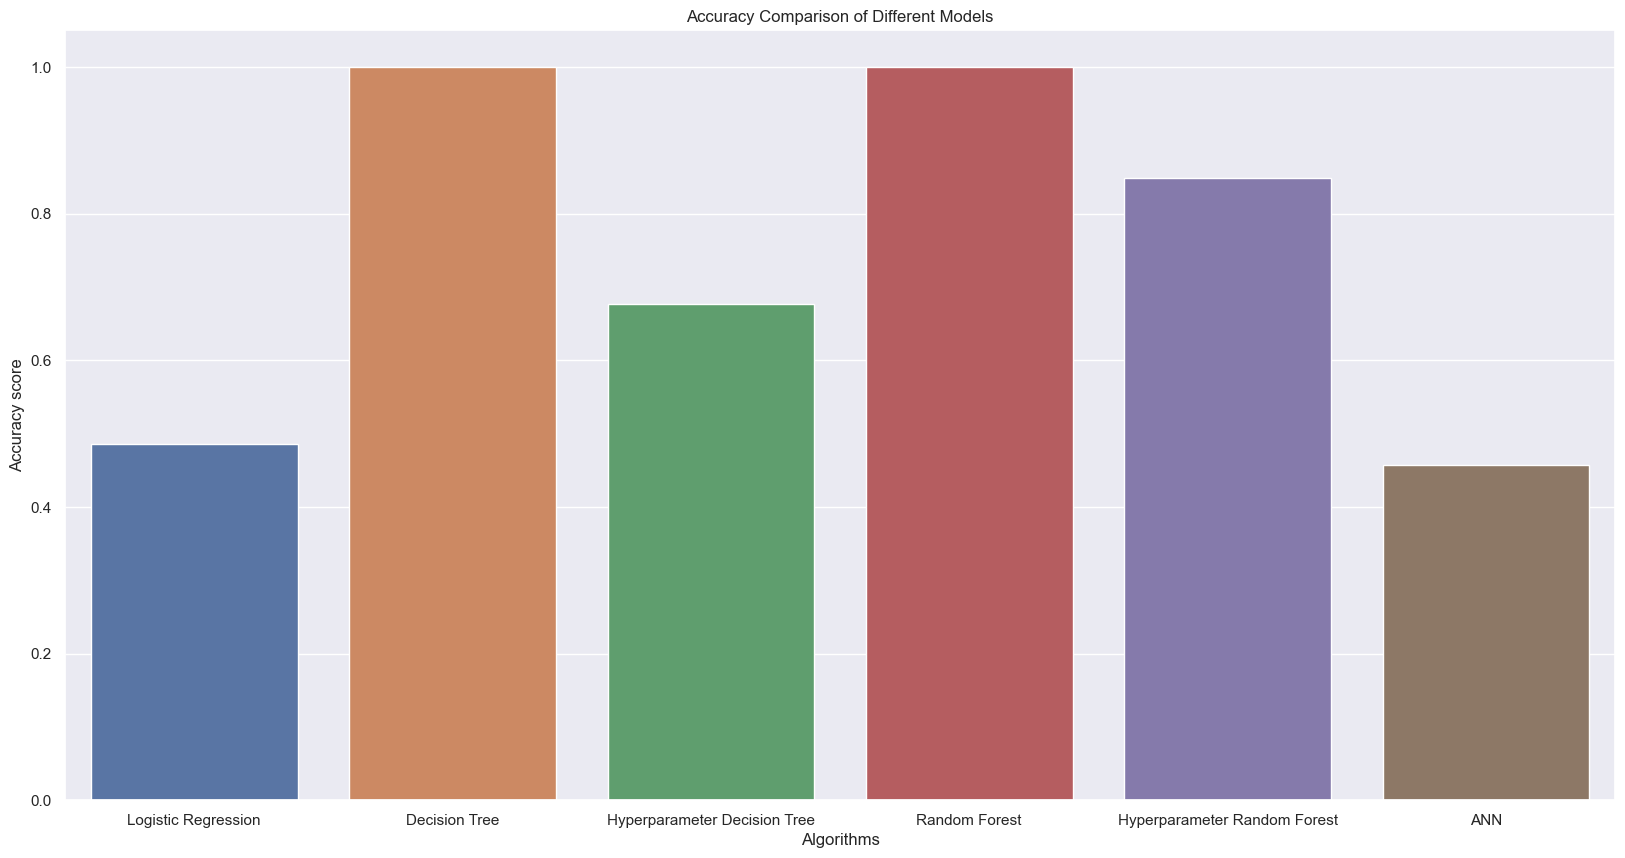

In [86]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title('Accuracy Comparison of Different Models')
sns.barplot(x=models,y=accuracies)

Model Training and Evaluation:

    Multiple models are trained: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier and MLPClassifier (ANN).
    Hyperparameter tuning is done for DecisionTree and RandomForest using GridSearchCV.
    Each model is evaluated using accuracy, Hamming loss, and classification report.
    Training and evaluation are printed for understanding the performance.

### Within all the models Two model gives more accuracy score followed closely by Decision Tree and Random Forest without Hyperparameter tuning
    While ANN had the lowest performance.


# Submission File

In [87]:
submission_df = pd.read_csv('sampleSubmission_small.csv')
# Prepare submission
test_ids = test_df['id']


In [88]:
# Predict for Test data
predictions_lr = model_lr.predict(X_test_hash)
predictions_dt = model_dt.predict(X_test_hash)
predictions_dt_hyper = best_dt.predict(X_test_hash)
predictions_rf = model_rf.predict(X_test_hash)
predictions_rf_hyper = best_rf.predict(X_test_hash)
predictions_ann = model_ann.predict(X_test_scaled)


In [89]:
# Flatten predictions
def flatten_predictions(predictions):
    return [pred[i] for pred in predictions for i in range(len(pred))]

predictions_lr_flat = flatten_predictions(predictions_lr)
predictions_dt_flat = flatten_predictions(predictions_dt)
predictions_dt_hyper_flat = flatten_predictions(predictions_dt_hyper)
predictions_rf_flat = flatten_predictions(predictions_rf)
predictions_rf_hyper_flat = flatten_predictions(predictions_rf_hyper)
predictions_ann_flat = flatten_predictions(predictions_ann)


In [90]:
# Create submission DataFrame
submission = pd.DataFrame({
    'id': [f'{id}_y{i}' for id in test_ids for i in range(1, 34)],
    'LogisticRegression': predictions_lr_flat,
    'DecisionTree': predictions_dt_flat,
    'DecisionTreeHyper': predictions_dt_hyper_flat,
    'RandomForest': predictions_rf_flat,
    'RandomForestHyper': predictions_rf_hyper_flat,
    'ANN': predictions_ann_flat
})

In [91]:
# Save to CSV
submission.to_csv('final_submission.csv', index=False)
print(submission.head())

             id  LogisticRegression  DecisionTree  DecisionTreeHyper  \
0  1698001.0_y1                   0             0                  0   
1  1698001.0_y2                   0             0                  0   
2  1698001.0_y3                   0             0                  0   
3  1698001.0_y4                   0             0                  0   
4  1698001.0_y5                   0             0                  0   

   RandomForest  RandomForestHyper  ANN  
0             0                  0    0  
1             0                  0    0  
2             0                  0    0  
3             0                  0    0  
4             0                  0    0  
